In [2]:
# Importing Data
import pandas as pd
brewing_materials = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/brewing_materials.csv')
beer_taxed = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_taxed.csv')
brewer_size = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/brewer_size.csv')
beer_states = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv')

In [2]:
from IPython.display import display

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Uploading State Abbreviations to State Names File
# The file is taken from https://github.com/jasonong/List-of-US-States/blob/master/states.csv
state_names = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv')
state_names.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


First let us explore the statewise beer production

In [4]:
beer_states.head()

,state,year,barrels,type
0,AK,2008,2067.69,On Premises
1,AK,2009,2263.65,On Premises
2,AK,2010,1929.15,On Premises
3,AK,2011,2251.02,On Premises
4,AK,2012,2312.43,On Premises


The data contains production of beer in barrels across sevral types for each state 

In [5]:
beer_states.shape

(1872, 4)

No missing values are present in beer states

In [6]:
beer_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
state      1872 non-null object
year       1872 non-null int64
barrels    1853 non-null float64
type       1872 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 58.6+ KB


Let's check whether there are any duplicate record present in beer states file

In [7]:
beer_states[beer_states.duplicated(keep=False)]

,state,year,barrels,type


No duplicate records are present

Let's check unique records for each of the columns

In [8]:
beer_states.state.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'total'], dtype=object)

- It can be seen that there is one column which contains total of all states
- For further analysis the `beer_states` will be split into two part: `statewise_production` and `total_production`

But before that lets see the unique value for all the different qualitiative columns

In [9]:
beer_states.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019], dtype=int64)

In [10]:
beer_states.type.unique()

array(['On Premises', 'Bottles and Cans', 'Kegs and Barrels'],
      dtype=object)

In [11]:
# Spliting the data
cond = beer_states['state'] == 'total'
statewise_production = beer_states.loc[~cond,:]
statewise_production.shape

(1836, 4)

In [12]:
total_production = beer_states.loc[cond,:]
total_production

,state,year,barrels,type
612,total,2008,4.671481e+05,On Premises
613,total,2009,4.679650e+05,On Premises
614,total,2010,5.136219e+05,On Premises
615,total,2011,5.490671e+05,On Premises
616,total,2012,5.509029e+05,On Premises
617,total,2013,5.748606e+05,On Premises
618,total,2014,6.682843e+05,On Premises
619,total,2015,1.275921e+06,On Premises
620,total,2016,2.014125e+06,On Premises
621,total,2017,2.656898e+06,On Premises


For `statewise_production` we will merge the full state name where instead of abbrevations. For this we will merge `statewise_production` with `state_names` file

In [18]:
statewise_production_2 = pd.merge(statewise_production, state_names, left_on= 'state',right_on = 'Abbreviation', how = 'left')
statewise_production_2.head()

,state,year,barrels,type,State,Abbreviation
0,AK,2008,2067.69,On Premises,Alaska,AK
1,AK,2009,2263.65,On Premises,Alaska,AK
2,AK,2010,1929.15,On Premises,Alaska,AK
3,AK,2011,2251.02,On Premises,Alaska,AK
4,AK,2012,2312.43,On Premises,Alaska,AK


In [19]:
columns = ['Abbreviation']
statewise_production_2.drop(columns, inplace=True, axis=1)
statewise_production_2

,state,year,barrels,type,State
0,AK,2008,2067.69,On Premises,Alaska
1,AK,2009,2263.65,On Premises,Alaska
2,AK,2010,1929.15,On Premises,Alaska
3,AK,2011,2251.02,On Premises,Alaska
4,AK,2012,2312.43,On Premises,Alaska
5,AK,2013,2155.60,On Premises,Alaska
6,AK,2014,2114.97,On Premises,Alaska
7,AK,2015,4511.48,On Premises,Alaska
8,AK,2016,13315.93,On Premises,Alaska
9,AK,2017,15974.10,On Premises,Alaska


In [20]:
statewise_production_2.shape

(1836, 5)

In [15]:
statewise_production_2.State.unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
       'Mississippi', 'Montana', 'North Carolina', 'North Dakota',
       'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada',
       'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin',
       'West Virginia', 'Wyoming'], dtype=object)

Yearwise beer production for each state

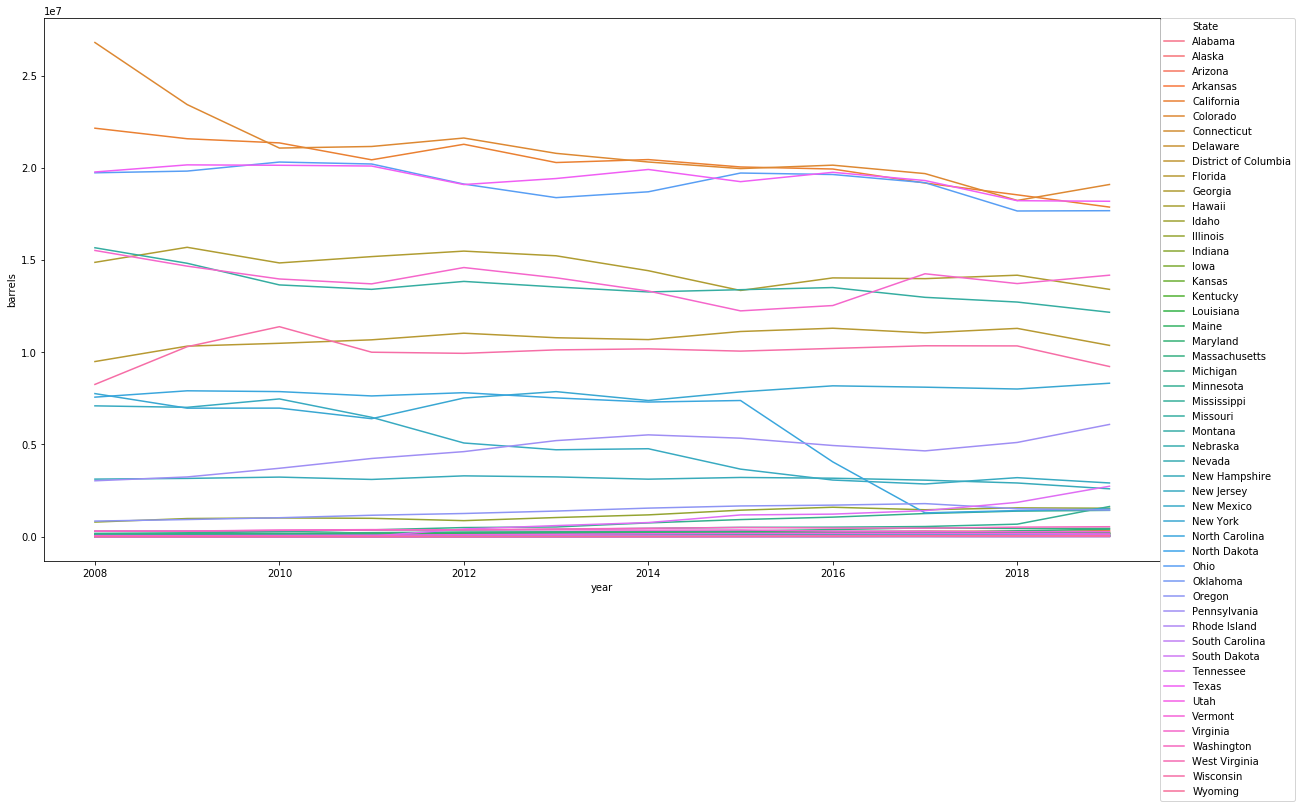

In [28]:
yearwise_prod = statewise_production_2.groupby(['State','year'])['barrels'].sum().reset_index()
plt.figure(figsize = (20,10))
sns.lineplot(x = yearwise_prod['year'], y = yearwise_prod['barrels'], hue = yearwise_prod['State'] )
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

The above visualization is not clear because we have visualized the beer production for all 50 states. Lets just visualize the beer production over the past 12 years for top 5 states in 2019

In [42]:
top_5_state = yearwise_prod[yearwise_prod.year == 2019].nlargest(5,'barrels').State.tolist()
top_5_state

['Colorado', 'Texas', 'California', 'Ohio', 'Virginia']

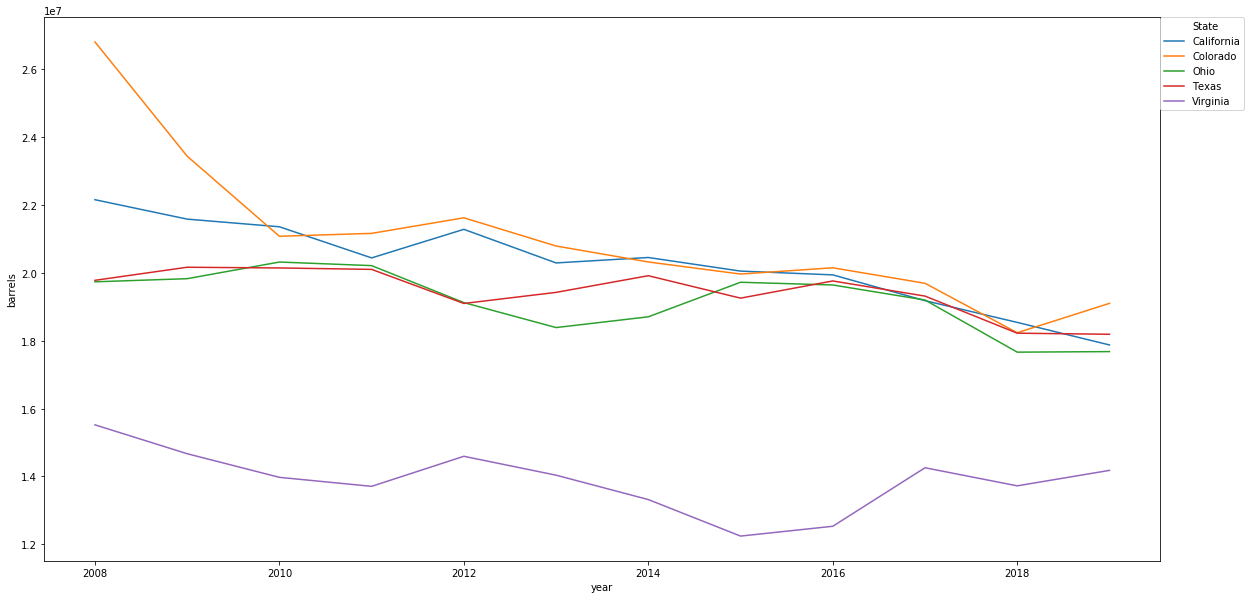

In [45]:
yearwise_prod_top_5 = yearwise_prod[yearwise_prod['State'].isin(top_5_state)]
plt.figure(figsize = (20,10))
sns.lineplot(x = yearwise_prod_top_5['year'], y = yearwise_prod_top_5['barrels'], hue = yearwise_prod_top_5['State'] )
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

- It can be seen that there is decrease in beer production in top 4 states over last 12 years.

Now let's see the trend in total production of beer across US from 2008 to 2012

We will plot the stacked bar graph indicating the contirbution of each type in beer production over the years

To plot stacked bar graph we will first pivot the type as columns and assign value of beer production in it

In [48]:
total_prod_pivot = total_production.pivot(index='year', columns='type', values='barrels')
total_prod_pivot

type,Bottles and Cans,Kegs and Barrels,On Premises
year,,,
2008,1.669300e+08,17285670.24,467148.07
2009,1.654322e+08,17461286.16,467964.96
2010,1.629721e+08,17725898.72,513621.90
2011,1.597082e+08,17817251.15,549067.09
2012,1.616927e+08,18157777.56,550902.89
2013,1.594136e+08,18097967.51,574860.64
2014,1.585425e+08,18176128.25,668284.27
2015,1.570146e+08,17750504.62,1275921.04
2016,1.554157e+08,17000382.28,2014125.21


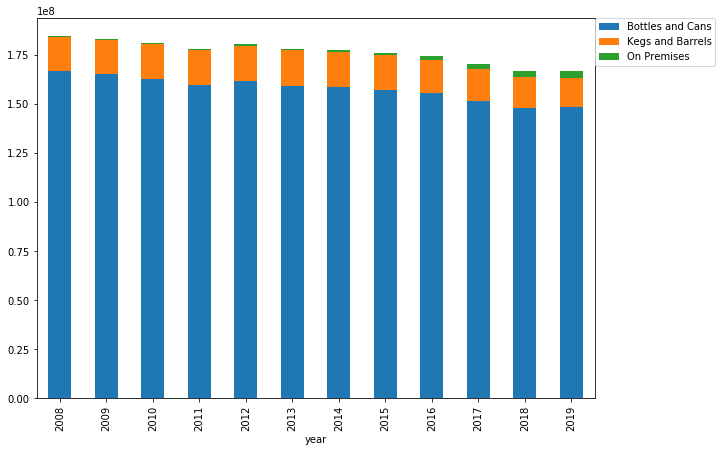

In [51]:
total_prod_pivot.loc[:,['Bottles and Cans','Kegs and Barrels', 'On Premises']].plot.bar(stacked=True, figsize=(10,7))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

- We can see that there is overall decrease in the beer production over the years
- Also, the majorty of beer produced is used in Bottles and Cans followed by Kegs and Barrels and least consumption is on premises

# Exploratory Data Analysis - Brewing Materials

Brewing Data has the information about the materials that are used for Brewing starting 2008 till 2017 and also split across the months.

In [3]:
brewing_materials.tail()

,data_type,material_type,year,month,type,month_current,month_prior_year,ytd_current,ytd_prior_year
1435,Pounds of Materials Used,Non-Grain Products,2017,12,Hops (dry),1453024,3040143,NaN,NaN
1436,Pounds of Materials Used,Non-Grain Products,2017,12,Hops (used as extracts),2117,29141,NaN,NaN
1437,Pounds of Materials Used,Non-Grain Products,2017,12,Other,657306,4048091,NaN,NaN
1438,Pounds of Materials Used,Total Non-Grain products,2017,12,Total Non-Grain products,2148660,7759483,NaN,NaN
1439,Pounds of Materials Used,Total Used,2017,12,Total Used,16027407,130675938,NaN,NaN


In [4]:
# Checking for NA's in the data
brewing_materials.isna()

,data_type,material_type,year,month,type,month_current,month_prior_year,ytd_current,ytd_prior_year
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1435,False,False,False,False,False,False,False,True,True
1436,False,False,False,False,False,False,False,True,True
1437,False,False,False,False,False,False,False,True,True
1438,False,False,False,False,False,False,False,True,True


In [5]:
brewing_filtered = brewing_materials.loc[(brewing_materials['type'] != 'Total Grain products') & 
                      (brewing_materials['type'] != 'Total Non-Grain products') &
                     (brewing_materials['type'] != 'Total Used')]

In [6]:
materials_agg = brewing_filtered.groupby(['year','type'], as_index = False).agg({'month_current':['sum']})
materials_agg.columns = materials_agg.columns.droplevel(1)
materials_agg

,year,type,month_current
0,2008,Barley and barley products,58048335
1,2008,Corn and corn products,726766392
2,2008,Hops (dry),54889519
3,2008,Hops (used as extracts),6019292
4,2008,Malt and malt products,4497468603
...,...,...,...
85,2017,Malt and malt products,112425009
86,2017,Other,4046586
87,2017,Rice and rice products,1853842
88,2017,Sugar and syrups,636659


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/apple/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


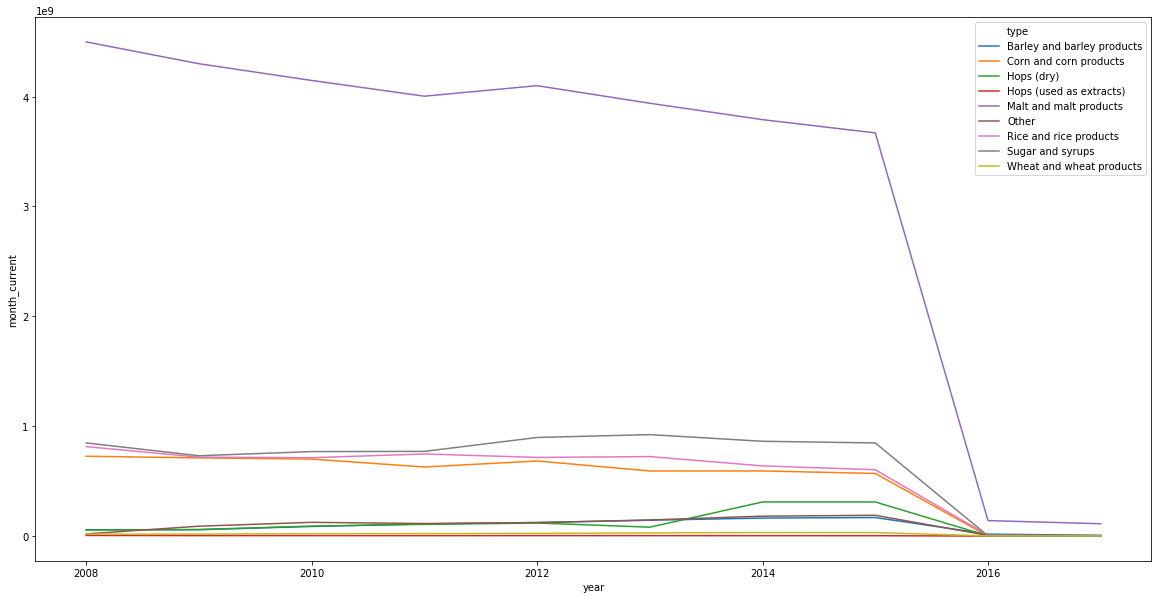

In [8]:
plt.figure(figsize=(20,10));
sns.lineplot(x="year", y="month_current", hue="type", data=materials_agg);

In [9]:
# To check the seasonality
materials_agg_1 = brewing_filtered.groupby(['month','type'], as_index = False).agg({'month_current':['sum']})
materials_agg_1.columns = materials_agg_1.columns.droplevel(1)
materials_agg_1

,month,type,month_current
0,1,Barley and barley products,45842239
1,1,Corn and corn products,468483639
2,1,Hops (dry),39499855
3,1,Hops (used as extracts),2743003
4,1,Malt and malt products,2681616494
...,...,...,...
103,12,Malt and malt products,2127865453
104,12,Other,54819894
105,12,Rice and rice products,388982394
106,12,Sugar and syrups,324253451


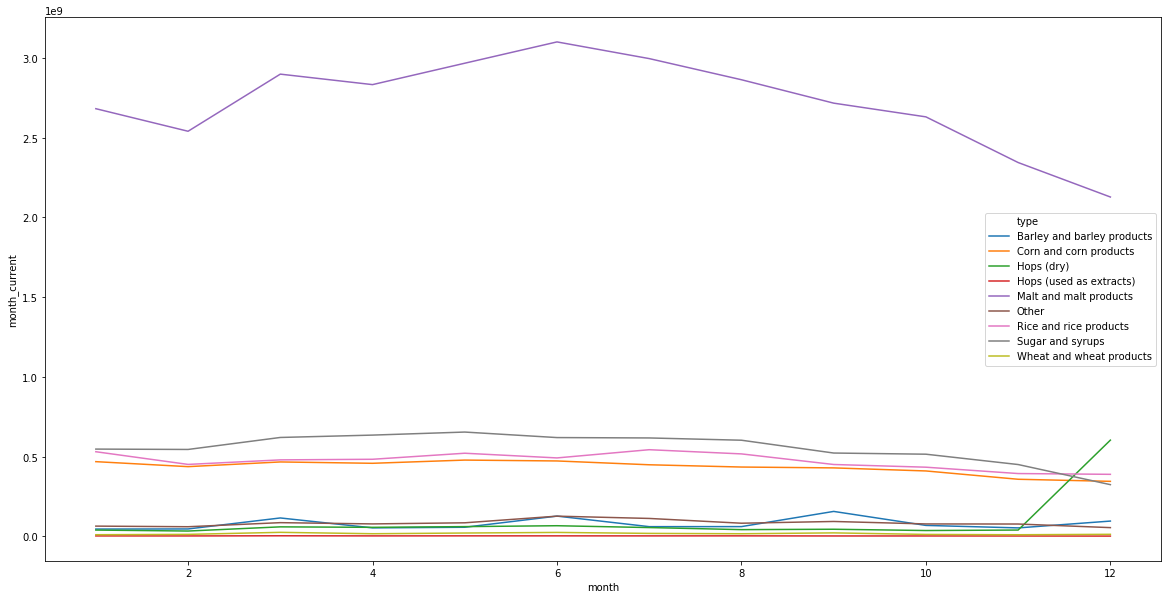

In [10]:
plt.figure(figsize=(20,10));
sns.lineplot(x="month", y="month_current", hue="type", data=materials_agg_1);

In [11]:
# Concatinating Year and Month to create ID - Brewing Data
brewing_materials['id'] = brewing_materials['year'].astype(str) + str('_') + brewing_materials['month'].astype(str)
brewing_materials['id']

0        2008_1
1        2008_1
2        2008_1
3        2008_1
4        2008_1
         ...   
1435    2017_12
1436    2017_12
1437    2017_12
1438    2017_12
1439    2017_12
Name: id, Length: 1440, dtype: object

In [12]:
# Pivoting Brewing Materials data

pivoted_brewing_materials = brewing_materials.pivot(index = 'id', columns = 'type', values = 'month_current')
pivoted_brewing_materials

type,Barley and barley products,Corn and corn products,Hops (dry),Hops (used as extracts),Malt and malt products,Other,Rice and rice products,Sugar and syrups,Total Grain products,Total Non-Grain products,Total Used,Wheat and wheat products
id,,,,,,,,,,,,
2008_1,3800844,57563519,4506546,621912,374165152,1291615,72402143,78358212,509108844,84778285,593887129,1177186
2008_10,3825118,63047343,3788949,337430,353803777,1568462,58607059,42828943,480715200,48523784,529238984,1431903
2008_11,3309266,53628776,3897905,329906,322733711,1247790,53971515,44000736,434602496,49476337,484078833,959228
2008_12,6152633,49919452,1576751,272045,318741733,1574456,61716256,38952441,437878833,42375693,480254526,1348759
2008_2,3236714,59513161,1815271,476688,355687578,1599119,66061597,80188744,485740033,84079822,569819855,1240983
...,...,...,...,...,...,...,...,...,...,...,...,...
2017_5,183174,1642,147645,1939,10242822,74380,1849,24725,10466338,248689,10715027,36851
2017_6,1333243,4584,251754,3152,12936288,1223682,4901,57026,14514033,1535614,16049647,235017
2017_7,175807,125,136540,1850,8321067,42006,1532,23179,8533719,203575,8737294,35188


In [13]:
beer_taxed.head()

,data_type,tax_status,year,month,type,month_current,month_prior_year,ytd_current,ytd_prior_year,tax_rate
0,Barrels Produced,Totals,2008,1,Production,16211480,15880125,16211480.0,15880125.0,$7/$18 per barrel
1,Barrels Produced,Taxable,2008,1,In bottles and cans,13222104,12824278,13222104.0,12824278.0,$7/$18 per barrel
2,Barrels Produced,Taxable,2008,1,In barrels and kegs,1371239,1357372,1371239.0,1357372.0,$7/$18 per barrel
3,Barrels Produced,Taxable,2008,1,"Tax Determined, Premises Use",7426,8419,7426.0,8419.0,$7/$18 per barrel
4,Barrels Produced,Sub Total Taxable,2008,1,Sub Total Taxable,14600769,14190069,14600769.0,14190069.0,$7/$18 per barrel


In [14]:
# Concatinating Year and Month to create ID - Brewing Data

beer_taxed['id'] = beer_taxed['year'].astype(str) + str('_') + beer_taxed['month'].astype(str)
beer_taxed['id']

0        2008_1
1        2008_1
2        2008_1
3        2008_1
4        2008_1
         ...   
1575    2019_12
1576    2019_12
1577    2019_12
1578    2019_12
1579    2019_12
Name: id, Length: 1580, dtype: object

In [15]:
# Processing Beer Taxed Data Set

# Filtering for to get month wise barrel production

beer_taxed_filtered = beer_taxed.loc[(beer_taxed['tax_status'] == 'Totals') & 
                      (beer_taxed['type'] == 'Production') ]
beer_taxed_filtered

,data_type,tax_status,year,month,type,month_current,month_prior_year,ytd_current,ytd_prior_year,tax_rate,id
0,Barrels Produced,Totals,2008,1,Production,16211480,15880125,16211480.0,15880125.0,$7/$18 per barrel,2008_1
11,Barrels Produced,Totals,2008,2,Production,15690494,15284087,31909489.0,31164212.0,$7/$18 per barrel,2008_2
22,Barrels Produced,Totals,2008,3,Production,17367476,17388588,49277784.0,48552848.0,$7/$18 per barrel,2008_3
33,Barrels Produced,Totals,2008,4,Production,17254160,16777943,66535007.0,65331867.0,$7/$18 per barrel,2008_4
44,Barrels Produced,Totals,2008,5,Production,18269043,18465892,84810051.0,83798440.0,$7/$18 per barrel,2008_5
...,...,...,...,...,...,...,...,...,...,...,...
1525,Barrels Produced,Totals,2019,8,Production,15359693,16944015,121082009.0,127395843.0,$3.50/$16 per barrel,2019_8
1536,Barrels Produced,Totals,2019,9,Production,15378683,15463120,136624519.0,142879231.0,$3.50/$16 per barrel,2019_9
1547,Barrels Produced,Totals,2019,10,Production,14344526,14041040,150911244.0,156915916.0,$3.50/$16 per barrel,2019_10
1558,Barrels Produced,Totals,2019,11,Production,12645622,12748191,163711735.0,169677500.0,$3.50/$16 per barrel,2019_11


In [16]:
# Merging pivoted_brewing_materials and Beer_taxed_filtered
barrels_raw_material = pd.merge(pivoted_brewing_materials,beer_taxed_filtered[['id','month_current']], on = 'id', how='left')
barrels_raw_material.head()

,id,Barley and barley products,Corn and corn products,Hops (dry),Hops (used as extracts),Malt and malt products,Other,Rice and rice products,Sugar and syrups,Total Grain products,Total Non-Grain products,Total Used,Wheat and wheat products,month_current
0,2008_1,3800844,57563519,4506546,621912,374165152,1291615,72402143,78358212,509108844,84778285,593887129,1177186,16211480
1,2008_10,3825118,63047343,3788949,337430,353803777,1568462,58607059,42828943,480715200,48523784,529238984,1431903,15951285
2,2008_11,3309266,53628776,3897905,329906,322733711,1247790,53971515,44000736,434602496,49476337,484078833,959228,14301054
3,2008_12,6152633,49919452,1576751,272045,318741733,1574456,61716256,38952441,437878833,42375693,480254526,1348759,13961733
4,2008_2,3236714,59513161,1815271,476688,355687578,1599119,66061597,80188744,485740033,84079822,569819855,1240983,15690494


In [17]:
# Fitting Linear Model 

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
barrels_raw_material.columns

Index(['id', 'Barley and barley products', 'Corn and corn products',
       'Hops (dry)', 'Hops (used as extracts)', 'Malt and malt products',
       'Other', 'Rice and rice products', 'Sugar and syrups',
       'Total Grain products', 'Total Non-Grain products', 'Total Used',
       'Wheat and wheat products', 'month_current'],
      dtype='object')

In [19]:
X = barrels_raw_material[['Barley and barley products', 'Corn and corn products',
       'Hops (dry)', 'Hops (used as extracts)', 'Malt and malt products',
       'Other', 'Rice and rice products', 'Sugar and syrups',
       'Wheat and wheat products']]
y = barrels_raw_material[['month_current']]

In [20]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model.score(X, y)

0.27932072779348205

In [1]:
model.coef_, model.intercept_

NameError: name 'model' is not defined